# Fig4. Disciplinary backgrounds of researchers working in Digital Humanities 

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

#### Define researchers data path

In [2]:
file_path = "data/mapeo_investigadores.csv"

#### Define function to clean researchers data

In [19]:
def prepare_data(data, num_of_discp):
    mini = data[["Área de procedencia/disciplina","ID investigador"]]
    mini.columns = ["disciplina", "id"]

    filtered_df = mini.loc[mini["disciplina"].str.contains(', ')]
    mini = mini.loc[mini["disciplina"].str.contains(', ') != True]
    new_discp = []
    for row in filtered_df.itertuples():
        for disciplina in row.disciplina.split(", "):
            new_discp.append([disciplina, row.id])
    fix_df = pd.DataFrame(new_discp, columns=["disciplina", "id"])
    mini = mini.append(fix_df)
    
    
    grouped = mini.groupby("disciplina")
    df2 = grouped.count().reset_index().sort_values(by=['id'], ascending=False).head(num_of_discp)
    return df2

#### Function to translate disciplinary backgrounds

In [20]:
def translate(dataframe, column_to_translate, translations_filename):    
    translations_df = read_csv(f"data/{translations_filename}.csv")
    translations_df.columns=["disciplina", "disciplinary_background"]
    df_def = pd.merge(dataframe, translations_df, on=column_to_translate, how='inner', validate="one_to_many")
    return df_def

#### Run program
## Change 'num_of_discp' to show as many disciplinary backgrounds as you want'

In [23]:
num_of_discp = 15
investigadores = read_csv(file_path)
df2 = prepare_data(investigadores, num_of_discp)
df2 = translate(df2, "disciplina", "disciplinas")

#### Print horizontal bar plot

<Figure size 432x288 with 0 Axes>

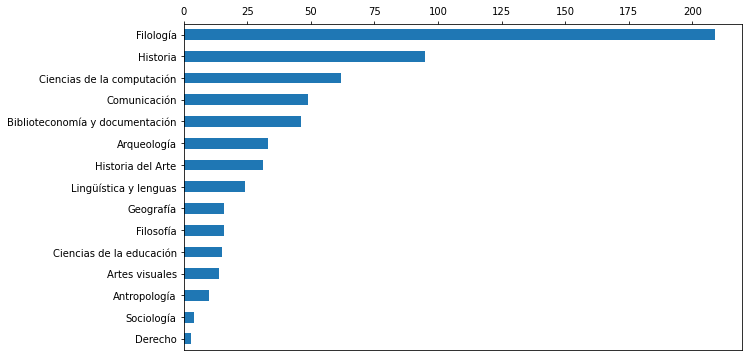

In [24]:
plt.figure()
ax = df2.plot.barh(x='disciplina', y='id', figsize=(10,6), legend=False)
ax.set_ylabel("")
ax.xaxis.tick_top() 
ax.invert_yaxis()
plt.show()